# Linear time-invariant systems

In signal and systems theory, a signal is a function of one or more independent variables, while a system produces a response to an input signal, **including substituting the signal into the function, changing the signal independent variables**, and outputting one or more signals. The most basic system can be described as $y[n]=T{x[n]}$.

The signals are divided into.

1. **Continuous time signal** and **Discrete time signal**, the difference between which is whether it is continuous in time or not. The audio signal is a continuous time signal, and after being sampled as a digital audio signal it becomes a discrete time signal.

2. **Deterministic signal** and **Random signal**, the difference is whether it is random or not.

3. **Periodic signals** and **Non-periodic signals**, the difference being the presence or absence of a period over the full interval. Deterministic audio signals whose frequency components change with time can be considered periodic within each frame after framing and windowing. Stationary random audio signals with distinct pitches also have **quasi-periodicity**.

4. **Even signal** and **Odd signal**. Since we truncate the audio signal, the time stamp of the digital audio signal starts from $t=0$, so there is no distinction between even and odd signals.

5. **Causal signals** (all zeros in the <0 part) and **Non-causal signals** (non-zero values in the <0 part). Similarly, since we truncate the audio signal, the digital audio signals are all causal.

6. Classified according to **signal energy**: finite-energy signals, finite-power signals and infinite signals (both power and energy are infinite), which were introduced in section 2 when power and energy were discussed. 

The system is divided into: 

1. **Memorable systems** and **No memory systems**: whether the output of the system is past and future related.

2. **Reversible** and **Non-reversible systems**: whether the output signal can be restored by the input signal.

3. **Linear** and **Non-linear systems**: the linear system satisfies $T\{ax_1[n]+bx_2[n]\}=aT\{x_1[n]\}+bT\{x_2[n]\}$.

4. **Time-invariant** and **Time-varying systems**: Time-invariant systems satisfy $y[n-n_0]=T\{x[n-n_0]\}$.

5. **Causal** and **Non-causal systems**: the output of a causal system depends on **past or present** (not future) inputs.

6. BIBO stability: If the **input signal is bounded**, the **output signal is bounded**.

The properties of linear time-invariant systems allow us to analyze their response characteristics by deriving their impulse response functions. All discrete signals can be represented as a superposition of a series of impulse functions $\delta [n]=\begin{cases}1,&n=0\\0,&others\end{cases}$: $x[n]=\displaystyle\sum_{k=-∞}^∞x[k]\delta[n-k]$. We assume that $y[n]=T\{x[n]\}$ and $h[n]=T\{\delta[n]\}$, $T$ is a linear time-invariant system, then we have $h[n-k]=T\{\delta[n-k]\}$ and $y[n]=T\{\displaystyle\sum_{k=-∞}^∞x[k]\delta [n-k]\}=\displaystyle\sum_{k=-∞}^∞x[k]h[n-k]$. Thus it is only necessary to know the response h of a simple impulsive function through a linear time-invariant system, and the response of a complex function x through the system can be derived by the convolution operation $x[k]*h[n]=\displaystyle\sum_{k=-∞}^{∞}x[k]h[n-k]$. **h can be used to describe the system linear time-invariant system. Any signal x passing through the system is the convolution of x with h**.

# Linear Time Invariant (LTI) Filters

The discrete-time Fourier transform has a very important property: the convolution in the time domain is equivalent to the multiplication in the frequency domain, i.e., if $y[n]=x[n]*h[n]$, then we have $Y(e^{j\omega})=X(e^{j\omega})H(e^{j\omega})$. This property is the basis for the design of linear time-invariant filters.

1. $|Y(e^{j\omega})|=|X(e^{j\omega})||H(e^{j\omega})|$, so we can design $H(e^{j\omega})$ such that $|H(e^{j\omega})|$ can perform the amplitude of each frequency component of $|X(e^{j\omega})|$ weighted so that the individual frequency components of $|Y(e^{j\omega})|$ have the desired amplitude, and $|H(e^{j\omega})|$ is called the **amplitude response** of the system $h$.

2. $\angle Y(e^{j\omega})|= \angle X(e^{j\omega})- \angle H(e^{j\omega})$, so that by designing $H(e^{j\omega})$ it is possible to make $x$ have the desired phase for each frequency component of $y$ obtained after passing through the system, and $\angle H(e^{j\omega})$ is called the **phase response** of the system $h$.

Usually, we want the filter to have a linear phase response, or a zero phase response. The zero phase response can be obtained using a bidirectional filtering approach, where a forward convolution operation is followed by a backward convolution operation, but this causes the magnitude response to become quadratic.

For digital audio signals, since the computer can only represent the results of the discrete Fourier transform of the signal $X[k]$ and $Y[k]$, we need to obtain $H[k]$ corresponding to $H(e^{j\omega})$. For the discrete Fourier transform, there is the property $\displaystyle y[n]=\sum_{m=0}^{N-1}x[m]h[(n-m))_N]$ then $Y[k]=X[k]H[k]$, where $((n))_N$ means that n takes the remainder of the number of Fourier transform points N. $\displaystyle\sum_{m =0}^{N-1}x[m]h[((n-m))_N]$ is called **cyclic convolution**. When $N$ takes all samples, the signal can be filtered at once. Otherwise, the signal can be filtered separately by framing and performing Fourier transform at each frame, and then retrieve the signal.

# Designing filters with z-transform

Performing the discrete-time Fourier transform on $h[n]$ yields $H(e^{j\omega})=\displaystyle\sum_{n=-∞}^{+∞}h[n]e^{-j\omega n}$, whose convergence condition is $h[n]$ absolutely integrable. To make a similar transformation possible for any $h[n]$, multiply it by the real exponent $r^{-n}$ and then perform the discrete Fourier transform. The size of $r$ can be adjusted to ensure that $h[n]r^{-n}$ is absolutely integrable. Thus, we have $H(re^{j\omega})=\displaystyle\sum_{n=-∞}^{+∞}h[n]r^{-n}e^{-j\omega n}$ and let $z=re^{j\omega}$, we get $H(z)=\displaystyle\sum_{n=-∞} ^{+∞}h[n]z^{n}$, which is the **z-transform**. Similarly, the signals $x[n]$ and $y[n]$ can be transformed into $X(z)$ and $Y(z)$ by z-transformation.

The discrete-time Fourier transform transforms the signal into the frequency domain, which is univariate and determines the function value purely by the parameter $\omega$. The z-transform, on the other hand, transforms the system and the signal into the **z-domain**, which, since $z=re^{j\omega}$, has two variables $r$ and $\omega$, and is therefore a plane, called the **z-plane**. The z-plane can be described using polar coordinates: $r$ is the amplitude and $\omega$ is the angle. The Fourier transform then corresponds to the z-transform when locking $r=1$, which is a unit circle around the origin of the polar coordinates. When $\omega$ takes different values, the corresponding $z$ rotates on the unit circle with a period of $2\pi$, which is also consistent with our discussion of the $X(e^{j\omega})$ property earlier in section 3.

The z-transform also has similar properties to the discrete-time Fourier transform: the convolution in the time domain is equivalent to the multiplication in the z-domain, i.e., if $y[n]=x[n]*h[n]$, then we have $Y(z)=X(z)H(z)$.

A rational z-transform can be factorized into $H(z)=A\frac{\displaystyle\prod_{i=1}^R(z-\beta_i)}{\displaystyle\prod_{j=1}^P(z-\alpha_j)}$, where $beta_i$ is all zeros and $z=\ beta_i,i=1,2,... ,R$ so that the numerator is 0; $\alpha_j$ is all poles, $z=\alpha_j,j=1,2,... ,P$ such that the denominator is 0. Then for each point on the z-plane, the calculation of its z-transformation can be replaced by the calculation **of vectors with all zeros and poles as the starting point and a point on the z-plane as the ending**: 

1. Amplitude: $|H(z)|=A\frac{\displaystyle\prod_{i=l}^R|z-\beta_i|}{\displaystyle\prod_{j=l}^P|z-\alpha_j|}$

2. Phase: $\angle H(z)=\displaystyle\sum_{i=l}^R\angle(z-\beta_i)-\sum_{j=l}^P\angle(z-\alpha_j)$

When taking $r=1$, the amplitude response and the phase response of the system are obtained. That means when we get all the zeros and poles of the system, its characteristics are determined. Therefore, designing the LTI filter can be done by designing the positions of the zeros and poles in the z-plane. Note the need to ensure that $h[n]r^{-n}$ is absolutely integrable when $r=1$.

# FIR filter and IIR filter

Assuming the constant $A=1$, expanding the numerator and denominator of $H(z)$, we have $H(z)=A\frac{\displaystyle\prod_{i=1}^R(z-\beta_i)}{\displaystyle\prod_{j=1}^P(z-\alpha_j)}=\frac{\displaystyle\sum_{i=0}^R b'_i z^{i}}{\displaystyle\sum_{j=0}^P a'_i z^{j}}=\frac{\displaystyle\sum_{i=0}^R b'_i z^{i-\max(R,P)}}{\displaystyle\sum_{j=0}^P a'_i z^{j-\max(R,P)}}$, which can be written as $H(z)=\frac{\displaystyle\sum_{i=0}^M b_i z^{-i}}{\displaystyle\sum_{j=0}^N a_j z^{-j }}$.

Another important property of the z-transform is that if the z-transform of $h[n]$ is $H(z)$, then the z-transform of $h[n-1]$ is $z^{-1}H(z)$, so multiplying a $z^{-1}$ in the z-domain is equivalent to delaying 1 sample point in the time domain. If $Y(z)=H(z)X(z)$, then we have $Y(z)=\frac{\displaystyle\sum_{i=0}^M b_i z^{-i}}{\displaystyle\sum_{j=0}^N a_j z^{-j}}X(z)$, that is, $\displaystyle\sum_{j =0}^N a_j z^{-j}Y(z)=\displaystyle\sum_{i=0}^M b_i z^{-i} X(z)$, then we have $\displaystyle\sum_{j=0}^N a_j y[n-j]=\displaystyle\sum_{i=0}^M b_i x[n-i ]$, that is, $y[n]=-\displaystyle\sum_{j=1}^N \frac{a_j}{a_0} y[n-j]+\displaystyle\sum_{i=0}^M \frac{b_i}{a_0} x[n-i]$. Then at $a_j\neq 0,\exist j>0$, the system input must contain a delay term of $y[n]$, i.e., there is feedback in the system, at which point the system is called **infinite impulse response (IIR) system**. Only when $a_j=0,\exist j>0$, the system input is only the weighted sum of $x[n]$ and its delay term, and the system is called **Finite Impulse Response (FIR) system**. A filter that satisfies the characteristics of an IIR system or a FIR system is called an IIR filter or a FIR filter.

# Simple FIR filter design

pyAudioKits provides functions to design FIR filters and IIR filters by specifying $a_j$ and $b_i$. Since it is difficult to design IIR filters by specifying $a_j$ and $b_i$, only the design of FIR filters by fixing $a_j=\begin{cases}1,&j=0\\0,&others\end{cases}$ and specifying $b_j$ is demonstrated.

In [1]:
import pyAudioKits.audio as ak
import pyAudioKits.filters as flt
import pyAudioKits.analyse as aly

First, a superposition of two frequency signals is generated.

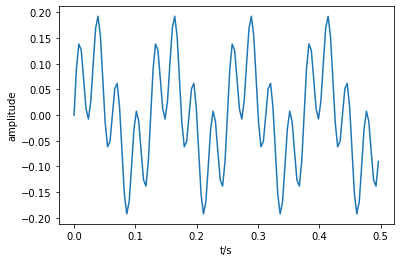

<Figure size 432x288 with 0 Axes>

In [2]:
signal = ak.create_Single_Freq_Audio(0.1,8,256,0.5) + ak.create_Single_Freq_Audio(0.1,32,256,0.5)
signal.plot()

In this case, the signal amplitude spectrum has two peaks and the amplitude is the same. 

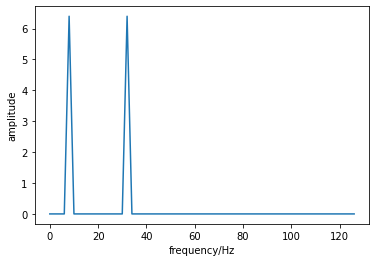

<Figure size 432x288 with 0 Axes>

In [3]:
aly.FFT(signal).plot()

Differencing is a typical high-pass filtering process. The system function of the first-order difference is $H(z)=1-z^{-1}$, which corresponds to the difference equation $y[n]=x[n]-x[n-1],n≥1$. 

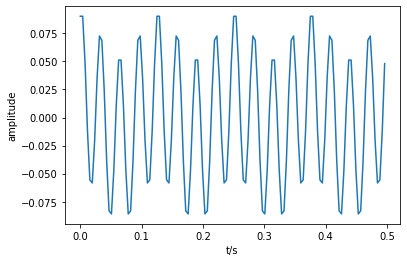

<Figure size 432x288 with 0 Axes>

In [4]:
signal_diff = flt.ltiFilter(signal, [1,-1], [1])    #Construct a linear time-invariant filter, set the numerator coefficients to b0=1 and b1=-1, and set the denominator coefficients to a0=1
signal_diff.plot()

Compare the first 5 samples of the original signal with the first-order differenced signal. Note that the first digit of the first-order differenced signal is not valid, and is padded using zeros. The valid signal is shifted 1 sample to the right overall, so the system is not zero-phase responsive.

In [5]:
signal[:5].samples, signal_diff[:5].samples

(array([0.        , 0.09021971, 0.13826834, 0.1262677 , 0.07071068]),
 array([ 0.09021971,  0.09021971,  0.04804863, -0.01200064, -0.05555702]))

Plot the amplitude spectrum of the signal after differencing.

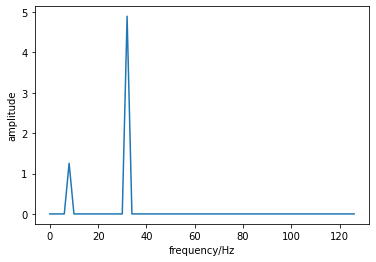

<Figure size 432x288 with 0 Axes>

In [6]:
aly.FFT(signal_diff).plot()

It can be seen that the low frequency component is suppressed and the amplitude of the high frequency component is greater than the low frequency component at this point.

Next, try using bi-directional filtering to achieve a zero-phase response.

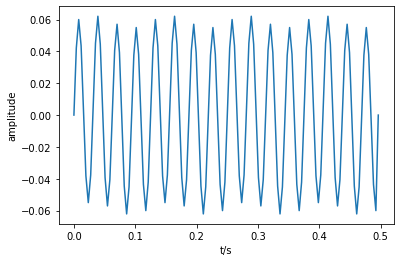

<Figure size 432x288 with 0 Axes>

In [7]:
signal_diff2 = flt.ltiFilter(signal, [1,-1], [1], zero_phase=True)
signal_diff2.plot()

Comparing the first five and the last five samples of the three signals. After bi-direction differencing, neither the first nor the last bit of the signal is valid, so the valid signal is centered overall. 

In [8]:
signal[:5].samples, signal[-5:].samples, signal_diff[:5].samples, signal_diff[-5:].samples, signal_diff2[:5].samples, signal_diff2[-5:].samples

(array([0.        , 0.09021971, 0.13826834, 0.1262677 , 0.07071068]),
 array([-0.01243628, -0.07071068, -0.1262677 , -0.13826834, -0.09021971]),
 array([ 0.09021971,  0.09021971,  0.04804863, -0.01200064, -0.05555702]),
 array([-0.02004833, -0.0582744 , -0.05555702, -0.01200064,  0.04804863]),
 array([0.        , 0.04217108, 0.06004927, 0.04355638, 0.00271737]),
 array([ 0.03822607, -0.00271737, -0.04355638, -0.06004927,  0.        ]))

Since the amplitude response is quadratic to the original, the degree of suppression of the low-frequency components is much stronger, and the amplitude of the low-frequency components is now much smaller than the high-frequency components.

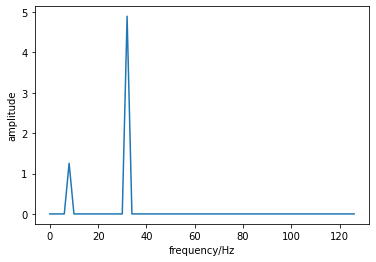

<Figure size 432x288 with 0 Axes>

In [9]:
aly.FFT(signal_diff).plot()

Smoothing is a typical low-pass filtering process. Taking the 9-point mean smoothing as an example, the system function is $H(z)=\displaystyle\frac{1}{9}\sum_{i=0}^8z^{-i}$, and the corresponding difference equation is $y[n]=\displaystyle\frac{1}{9}\sum_{i=0}^8x[n-i]$.

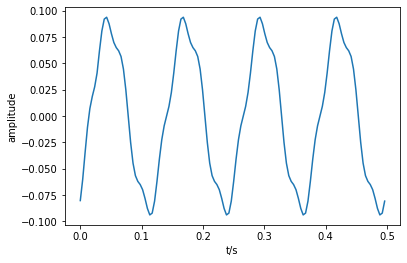

<Figure size 432x288 with 0 Axes>

In [10]:
signal_ma = flt.ltiFilter(signal, [1/9 for i in range(9)], [1]) #Construct a linear time-invariant filter, set the numerator coefficients to b0~b8=1/9, and set the denominator coefficients to a0=1
signal_ma.plot()

The filtered signal is similar to a single-frequency sine wave, and its amplitude spectrum shows that the high-frequency components have been filtered out a lot.

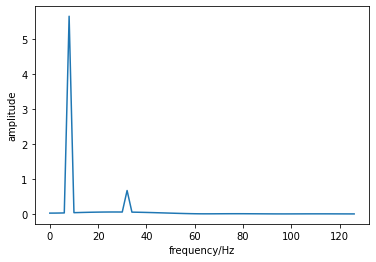

<Figure size 432x288 with 0 Axes>

In [11]:
aly.FFT(signal_ma).plot()

Bi-directional filtering also allows the low-pass filter to maintain a zero-phase response. Furthermore, if the smoothing is centralized, i.e., $y[n]=\displaystyle\frac{1}{9}\sum_{i=-4}^4x[n-i]$, then the corresponding filter itself has a zero-phase response, but it would be non-causal.

# Designing IIR filters based on Butterworth filters

The design of IIR filters requires consideration of feedback, which is more complex. It is usually done by transforming existing analog filters. pyAudioKits provides IIR filter design functions modeled on Butterworth filters.

The Butterworth filter requires a specified order. Let's first see the difference in the effect of Butterworth filters of different orders.

First, white noise is generated and its amplitude spectrum is plotted.

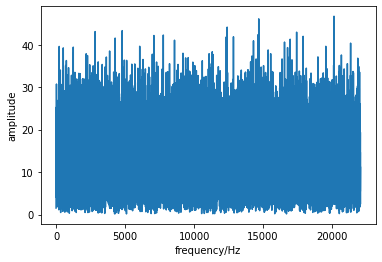

<Figure size 432x288 with 0 Axes>

In [12]:
wn = ak.create_Single_Freq_Audio(0.1,440,44100,1) .addWgn(0.1) - ak.create_Single_Freq_Audio(0.1,440,44100,1)
aly.FFT(wn).plot()

It can be seen that the white noise amplitude spectrum is uniformly distributed over [0,sample rate/2].

First, a 1st order high-pass Butterworth filter is constructed for filtering, and the **cutoff frequency** is specified as 11050 Hz. For the high-pass filter, the low frequency is the stopband and the high frequency is the passband. The filter will suppress the frequency component of the stopband, and the power of the stopband will be attenuated compared to the passband. The cutoff frequency is the position where the power in the stopband is attenuated by $3dB$ compared to the passband.

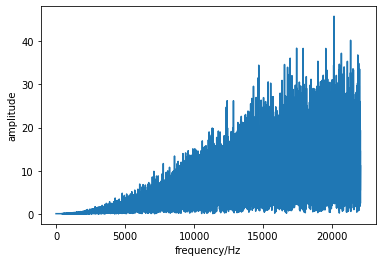

<Figure size 432x288 with 0 Axes>

In [13]:
aly.FFT(flt.highPassButterN(wn, 1, 11050)).plot()

Although the cutoff frequency is specified as 11050 Hz, it still has a high amplitude until below 5000 Hz.

Next, try a 5th order high-pass Butterworth filter.

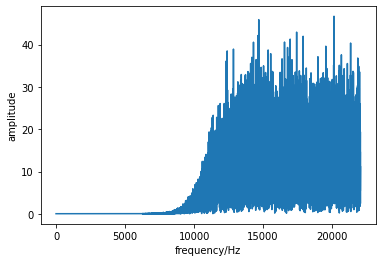

<Figure size 432x288 with 0 Axes>

In [14]:
aly.FFT(flt.highPassButterN(wn, 5, 11050)).plot()

It can be seen that the decay from the passband to the stopband becomes rapid. Go ahead and try the 10th order filter.

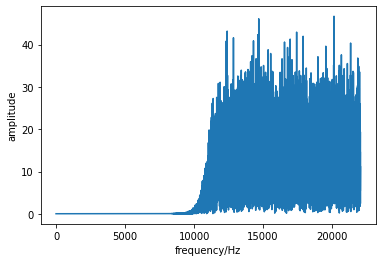

<Figure size 432x288 with 0 Axes>

In [15]:
aly.FFT(flt.highPassButterN(wn, 10, 11050)).plot()

The decay of the passband to the stopband has become more rapid.

The same law applies to low-pass, band-pass and band-stop filters.

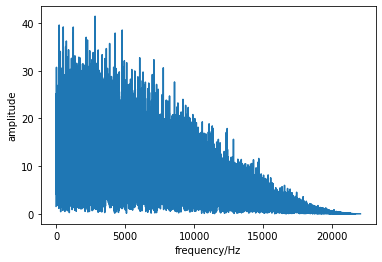

<Figure size 432x288 with 0 Axes>

In [16]:
aly.FFT(flt.lowPassButterN(wn, 1, 11050)).plot()

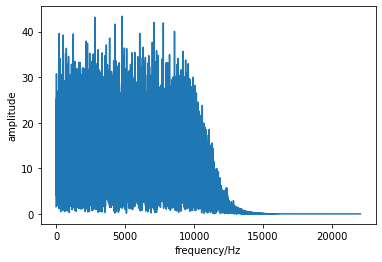

<Figure size 432x288 with 0 Axes>

In [17]:
aly.FFT(flt.lowPassButterN(wn, 5, 11050)).plot()

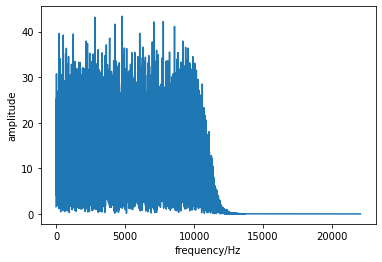

<Figure size 432x288 with 0 Axes>

In [18]:
aly.FFT(flt.lowPassButterN(wn, 10, 11050)).plot()

Bandpass filters and bandstop filters have two cutoff frequencies. For bandpass filters, the passband is between the two cutoff frequencies; for bandstop filters, the stopband is between the two frequencies.

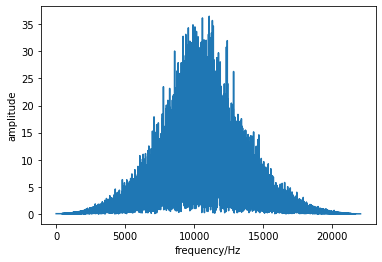

<Figure size 432x288 with 0 Axes>

In [19]:
aly.FFT(flt.bandPassButterN(wn, 1, 7500, 13500)).plot()

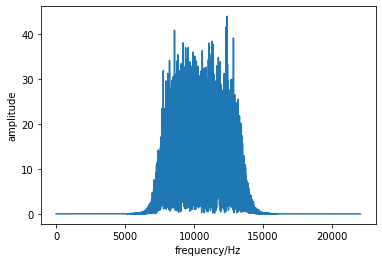

<Figure size 432x288 with 0 Axes>

In [20]:
aly.FFT(flt.bandPassButterN(wn, 5, 7500, 13500)).plot()

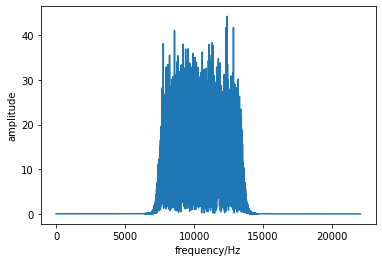

<Figure size 432x288 with 0 Axes>

In [21]:
aly.FFT(flt.bandPassButterN(wn, 10, 7500, 13500)).plot()

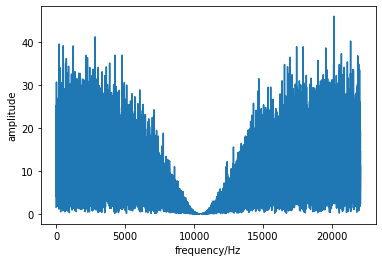

<Figure size 432x288 with 0 Axes>

In [22]:
aly.FFT(flt.bandStopButterN(wn, 1, 7500, 13500)).plot()

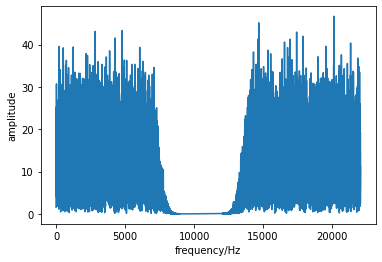

<Figure size 432x288 with 0 Axes>

In [23]:
aly.FFT(flt.bandStopButterN(wn, 5, 7500, 13500)).plot()

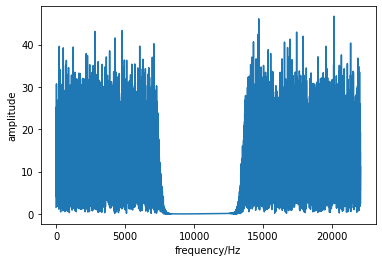

<Figure size 432x288 with 0 Axes>

In [24]:
aly.FFT(flt.bandStopButterN(wn, 10, 7500, 13500)).plot()

It is tedious to adjust the attenuation speed by trying different orders. The filter can be designed by directly specifying the passband cutoff frequency and the stopband cutoff frequency. In addition, the maximum loss of passband power and the minimum attenuation of blockband power can also be specified.

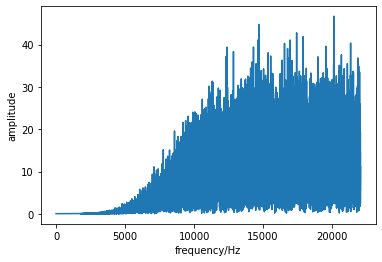

<Figure size 432x288 with 0 Axes>

In [25]:
aly.FFT(flt.highPassButter(wn, 11050, 5000, 1, 10)).plot()   #Butterworth high-pass filter with a specified passband cutoff frequency of 11050Hz and a stopband cutoff frequency of 5000Hz, with a maximum loss of 1dB of passband power and at least 10dB of stopband power attenuation

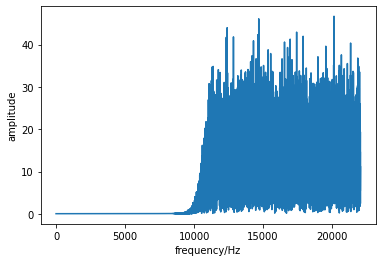

<Figure size 432x288 with 0 Axes>

In [26]:
aly.FFT(flt.highPassButter(wn, 11050, 10000, 1, 10)).plot()   #Butterworth high-pass filter, specified passband cutoff frequency of 11050Hz, stopband cutoff frequency of 10000Hz, passband power loss of up to 1dB, stopband power attenuation of at least 10dB

With the same 11050hz as the passband cut-off frequency, the attenuation speed from passband to stopband is much slower when the stopband cut-off frequency is 5000Hz than when the stopband cut-off frequency is 10000hz.